In [3]:
import numpy as np
import pandas as pd
import random as rnd
import math
import statistics
import matplotlib.pyplot as plt 

In [79]:
def ran_vector(dim):
    '''
    Takes in a dimension and returns randomly generated unit vector of
    th
    at dimension from uniform distribution with mean 0.
    
    dim: number of dimensions for generated vectors
    
    returns:
        a numpy array containing a randomly generated unit vector
    '''
    vec = []
    for i in range(dim):
            uni_x = rnd.random()
            vec.append(uni_x)
    array = np.array(vec)
    
    #make distribution mean 0 per hw directions
    npvec = array - (np.mean(array))

    #normalizes vector by dividing by vector length/magnitude
    mag = math.sqrt(sum(npvec ** 2))
    out = npvec / mag 
    return out

In [527]:
def linear_as(num_vectors,dim):
    fi = many_vec(num_vectors,dim)
    gi = many_vec(num_vectors,dim)
    fi = fi / np.linalg.norm(fi, axis=1)[:, np.newaxis]
    gi = gi / np.linalg.norm(gi, axis=1)[:, np.newaxis]

    # (b) Compute the outer product matrices, Ai = gifiT
    Ai = np.array([np.outer(gi[i], fi[i]) for i in range(num_vectors)])

    # (c) Form the overall connectivity matrix, A, as the sum of the individual outer product matrices
    A = np.sum(Ai, axis=0)

    # (d) Test the resulting matrix A
    # (i) Compute the predicted output, g', for each stored input, fi using A
    g_prime = np.dot(A, fi.T).T

    
    # (iv) Test the selectivity of the system by generating a new set of 50 random vectors, let’s call them hi, and computing the predicted outputs (hi’) using the A matrix you constructed above (i.e., find the matrix product between each hi vector and A: Ahi).

    pred = np.array(g_prime)
    gs = np.array(gi)
    squared_errors = np.sum((pred - gs) ** 2, axis=1)
    return squared_errors
    
    
    #print("Average length of hi':", np.mean(length_hi_pred))
   # print("Average length of gi:", np.mean(length_gi))
    #print("Average cosine:", np.mean(cosine))
   


In [5]:
def many_vec(n,dim):
    '''
    runs ran_vector many times
    '''
    out = []
    for i in range(n):
        x = ran_vector(dim)
        out.append(x)
    return out

In [6]:
def norm(vec):
    '''
    Computes the length of a vector.
    
    v: vector
    return:
        a float length of a vector
    '''
    vec = np.array(vec)
    mag = math.sqrt(sum(vec ** 2))
    return mag
    

In [7]:
def find_norms(x):
    '''
    uses length function on many vectors
    '''
    x = np.array(x)
    out = []
    for i in range(len(x)):
        s = norm(x[i])
        out.append(s)
    return out

In [8]:
def cos(a,b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    norm_a = a/len_a
    norm_b = b/len_b
    cos_angle = np.dot(norm_a,norm_b)
    return cos_angle

#

#

#

In [10]:
def wH(f,g,A,k=1):
    Ai = np.array([np.outer(f, g)])
    A = np.sum(Ai, axis=0)

    # 3) compute the predicted output, g', for each stored input, fi, using A
    g_prime = np.dot(A, f)

    # 4) Create Delta a
    delta_A = np.dot( k*(g-g_prime),f)

    # 5) add delta_A to original A matrix
    A = A + delta_A

    # 6) predictions
    pred = np.dot(A, f)
    
    return A,pred

In [11]:
def mean_squared_error(pred, gs):
    pred = np.array(pred)
    gs = np.array(gs)
    squared_errors = np.sum((pred - gs) ** 2, axis=1)
    mse = np.mean(squared_errors)
    return mse

In [493]:
def LMS (pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    z = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    h_set = z / np.linalg.norm(z, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    
  
    while ( True ):# number of iterations of this loop is number of trials
        randomList = [] #keeps track of which pairs used in one trial
        for i in range(pairs-len(randomList)):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
            
            r = rnd.randint(1,pairs-1)
            if r not in randomList: 
                randomList.append(r)
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                k = 1 - trials
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #keep track of prediction vectors
                pred_list.append(pred)
            
            #continues for loop if pair is already picked
            else:
                continue 
                
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
            
       
        #all_mse[1:] bc list intialized with 1
        #trials - 1 bc intialized as 1
    return all_mse[1:], trials-1
   
       
    

#

#

#

#

## Part A)
- Both K values (k=0.1 and k = (1/(fiTfi)-epsilon)/j) resulted in oscillations of error vector length from about a little more than 0 and 0.4. The same oscillations occured even for the vector h, a vector not related to the association between f and g


### Part ai)

In [502]:
def LMSa (pairs,dim,threshold,k):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    z = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    h_set = z / np.linalg.norm(z, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    pred_list_h = []
    gs = []
    hs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    all_mse = [1]
    
  
    while ( True ):# number of iterations of this loop is number of trials
        randomList = [] #keeps track of which pairs used in one trial
        for i in range(pairs-len(randomList)):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
            
            r = rnd.randint(1,pairs-1)
            if r not in randomList: 
                randomList.append(r)
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                h = h_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                k = k
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                h_pred = np.dot(A,h)
                
                #keep track of prediction vectors
                pred_list.append(pred)
                pred_list_h.append(h_pred)
            #continues for loop if pair is already picked
            else:
                continue 
                
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
            
       
        #all_mse[1:] bc list intialized with 1
        #trials - 1 bc intialized as 1
    #for normal return of mean error vectors with g prediction
    #return np.array(find_norms(gs)) - np.array(find_norms(pred_list))
   #for return of mean error vectors with h prediction
    return np.array(find_norms(gs)) - np.array(find_norms(pred_list_h))
    
   
       
    

In [275]:
#part a1) making oscillations when K is a constant. Different pair sizes 
A120= LMSa(20,100,0.0000001,0.1)
A140= LMSa(40,100,0.0000001,0.1)
A160= LMSa(60,100,0.0000001,0.1)
A180= LMSa(80,100,0.0000001,0.1)


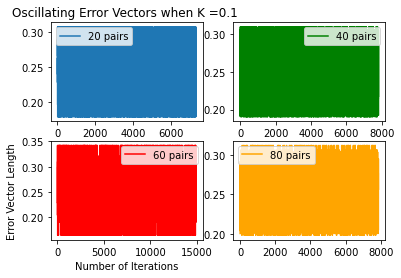

In [277]:
plt.subplot(2,2,1)
plt.plot(A120,label = "20 pairs")
plt.title("Oscillating Error Vectors when K =0.1 ")
plt.legend()

plt.subplot(2,2,2)
plt.plot(A140,label = "40 pairs", color = "green")
plt.legend()

plt.subplot(2,2,3)
plt.plot(A160,label = "60 pairs", color = "red")
plt.ylabel("Error Vector Length")
plt.xlabel("Number of Iterations")
plt.legend()

plt.subplot(2,2,4)
plt.plot(A180,label = "80 pairs", color = "orange")
plt.legend()
plt.show()

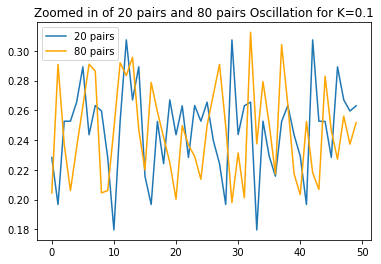

In [278]:

plt.plot(A120[200:250],label = "20 pairs")
plt.plot(A180[200:250],label = "80 pairs",color = "orange")
plt.title("Zoomed in of 20 pairs and 80 pairs Oscillation for K=0.1")

plt.legend()

In [504]:
h_pred = LMSa(20,100,0.0000001,0.1)

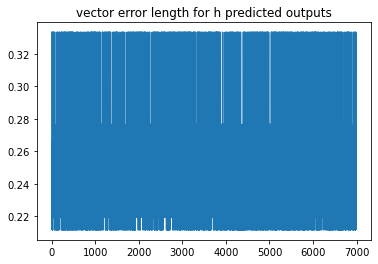

In [506]:
plt.plot(h_pred)
plt.title("vector error length for h predicted outputs")
plt.show()

### Part aii)

In [496]:
def LMSaii (pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    
  
    while ( True ):# number of iterations of this loop is number of trials
        randomList = [] #keeps track of which pairs used in one trial
        for i in range(pairs-len(randomList)):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
            
            r = rnd.randint(1,pairs-1)
            if r not in randomList: 
                randomList.append(r)
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                
                k = ((1/np.dot(f,f)) - (1/1000)) / trials
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #keep track of prediction vectors
                pred_list.append(pred)
            
            #continues for loop if pair is already picked
            else:
                continue 
                
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
            
    #for normal return of mean error vectors with g prediction
    #return np.array(find_norms(gs)) - np.array(find_norms(pred_list))
    
    
   #for return of mean error vectors with h prediction
    return np.array(find_norms(gs)) - np.array(find_norms(pred_list_h))
    
       
    

In [480]:
#part aii) when K = 1/(fiTfi)-epsilon)/j
Aii20= LMSaii(20,100,0.0000001)
Aii40= LMSaii(40,100,0.0000001)
Aii60= LMSaii(60,100,0.0000001)
Aii80= LMSaii(80,100,0.0000001)

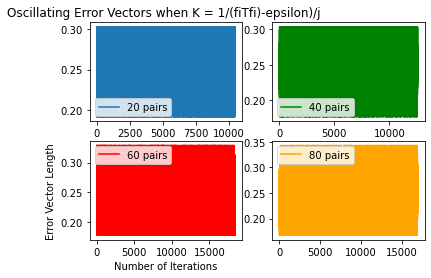

In [481]:

plt.subplot(2,2,1)
plt.plot(Aii20,label = "20 pairs")
plt.title("Oscillating Error Vectors when K = 1/(fiTfi)-epsilon)/j ")
plt.legend()

plt.subplot(2,2,2)
plt.plot(Aii40,label = "40 pairs",color = "green")
plt.legend()

plt.subplot(2,2,3)
plt.plot(Aii60,label = "60 pairs",color = "red")
plt.ylabel("Error Vector Length")
plt.xlabel("Number of Iterations")
plt.legend()

plt.subplot(2,2,4)
plt.plot(Aii80,label = "80 pairs",color = "orange")
plt.legend()
plt.show()

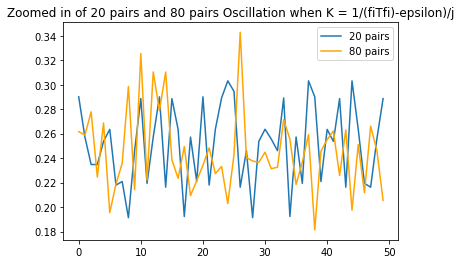

In [482]:
plt.plot(Aii20[200:250],label = "20 pairs")
plt.plot(Aii80[200:250],label = "80 pairs",color = "orange")
plt.title("Zoomed in of 20 pairs and 80 pairs Oscillation when K = 1/(fiTfi)-epsilon)/j")

plt.legend()

#

#

#

## Part b) Convergence
- It seems like the more associations put into the system, the longer the system takes to converge to a mean squared error rate, except for when there is 80 pairs. According to my data, 80 pairs takes less iterations then 60 and 40. To investigate this more, I also plotted 1000 pairs and the number of iterations it took for the mean squared error to converge was the lowest out of any number of pairs.

- I used k = 1 - (1/1000)


In [341]:
def LMSb (pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    associations = 1
  
    while ( True ):# number of iterations of this loop is number of trials
        randomList = [] #keeps track of which pairs used in one trial
        for i in range(pairs-len(randomList)):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
            
            r = rnd.randint(1,pairs-1)
            if r not in randomList: 
                randomList.append(r)
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                
                k = 1 - (1/1000)
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #keep track of prediction vectors
                pred_list.append(pred)
                associations =  associations+1
            
            #continues for loop if pair is already picked
            else:
                continue 
                
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1])) / all_mse[-1] < abs(threshold): 
            break
        else: 
            continue
            
       
        
    return all_mse, associations
    
    
   
       
    

In [342]:
B20,y20= LMSb(20,100,0.000001)
B40,y40= LMSb(40,100,0.000001)
B60,y60= LMSb(60,100,0.000001)
B80,y80= LMSb(80,100,0.000001)
B1000,y1000= LMSb(1000,100,0.000001)

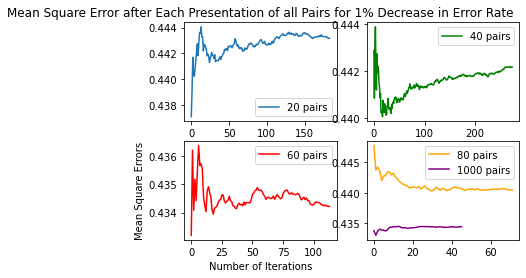

In [343]:
plt.subplot(2,2,1)
plt.plot(B20[1:],label = "20 pairs")

plt.title("Mean Square Error after Each Presentation of all Pairs for 1% Decrease in Error Rate")
plt.legend()

plt.subplot(2,2,2)
plt.plot(B40[1:],label = "40 pairs",color = "green")
plt.legend()

plt.subplot(2,2,3)
plt.plot(B60[1:],label = "60 pairs",color = "red")
plt.ylabel("Mean Square Errors")
plt.xlabel("Number of Iterations")
plt.legend()

plt.subplot(2,2,4)
plt.plot(B80[1:],label = "80 pairs",color = "orange")
plt.legend()

plt.subplot(2,2,4)
plt.plot(B1000[1:],label = "1000 pairs",color = "purple")
plt.legend()

plt.show()

#

#

#

### Part C)
- I tried to run my least means square function until the error vector between h and g was less than predicted g and g, but my system went into over 128000 pairs and still kept running. I had to stop the iterations because it was taking minutes. I found this out by printing pairs after each iteration

In [494]:
def LMSc (pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    z = np.random.rand(pairs,dim)
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    h_set = z / np.linalg.norm(z, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    
    pred_list_h = []
    all_mse_h = []
    
  
    while ( True ):# number of iterations of this loop is number of trials
        randomList = [] #keeps track of which pairs used in one trial
        for i in range(pairs-len(randomList)):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
            
            r = rnd.randint(1,pairs-1)
            if r not in randomList: 
                randomList.append(r)
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                h = h_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                k = 1 - trials
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #put h into A
                pred_h = np.dot(A, h)
                
                #keep track of prediction vectors
                pred_list.append(pred)
                pred_list_h.append(pred_h)
            
            #continues for loop if pair is already picked
            else:
                continue 
                
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        mse_h = mean_squared_error(pred_list_h,gs)
        
        all_mse.append(mse)
        all_mse_h.append(mse_h)
        
        #error_length = np.array(find_norms(gs)) - np.array(find_norms(pred_list))
        #if (np.mean(error_length) < threshold):
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
    gs = np.array(gs)
    pred_list = np.array(pred_list)
    return np.sqrt(np.sum((gs - pred_list)**2)) , np.sqrt(np.sum((gs - pred_list_h))**2)
    

In [491]:
def deterioation(dim,threshold):
    pairs = 1000
    errorVec_pairs= [0]
    errorVec_h_pairs = [0]
    
    while (errorVec_pairs[-1] <= errorVec_h_pairs[-1]):
        pairs = pairs * 2
        error, error_h = LMSc(pairs,dim,threshold)
        errorVec_pairs.append(error)
        errorVec_h_pairs.append(error_h)
        print(pairs)
    return count, errorVec_pairs[-1], errorVec_h_pairs[-1],pairs
        
        
        
        

In [492]:
deterioation(100,0.01)

2000
4000
8000
16000
32000
64000
128000


KeyboardInterrupt: 

#

#

#

## Part D
- In a linear associator, the associations learned are dependent on the order in which they are presented. Therefore, if associations are presented in different requences, the model's weights and outputs would change, meaning different associations are being learned. However, if associations are presented sequentially in the Widrow-Hoff system, no learning more learning will occur, resulting in constant mean squared error rate. 

In [209]:
def LMSdforwards (pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    
  
    while ( True ):# number of iterations of this loop is number of trials
        
        for r in range(pairs):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                k = 1 - (1/1000)
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #keep track of prediction vectors
                pred_list.append(pred)
            
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
            
       
        #all_mse[1:] bc list intialized with 1
        #trials - 1 bc intialized as 1
    return all_mse[1:], trials-1

In [212]:
# presents associations in sequence
dfor20, trial_d120 = LMSdforwards(20,100,0.001)
dfor40, trial_d140= LMSdforwards(40,100,0.001)
dfor60, trial_d160= LMSdforwards(860,100,0.001)
dfor80, trial_d180= LMSdforwards(80,100,0.001)

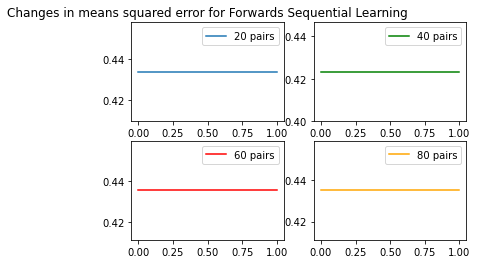

In [509]:
plt.subplot(2,2,1)
plt.plot(dfor20,label = "20 pairs")
plt.title("Changes in means squared error for Forwards Sequential Learning")
plt.legend()

plt.subplot(2,2,2)
plt.plot(dfor40,label = "40 pairs",color = "green")
plt.legend()

plt.subplot(2,2,3)
plt.plot(dfor60,label = "60 pairs",color = "red")
plt.legend()

plt.subplot(2,2,4)
plt.plot(dfor80,label = "80 pairs",color = "orange")
plt.legend()
plt.show()

In [215]:
def LMSdback(pairs,dim,threshold):
    '''
    Uses the Least Means Squares Algorithm to correct matrix A until
    change in mean square error between iterations is below a threshold.
    
    pair: Pairs of random unit vectors. How many vectors in f and g each
    dim: dimension of unit vectors
    threshold: What the change in mean square error is for simulation to stop
    
    '''
    
    # 1) create f_set and g_set, pairs of many vectors of dim 100
    s = np.random.rand(pairs,dim)
    w = np.random.rand(pairs,dim)
    f_set = s / np.linalg.norm(s, axis=1)[:, np.newaxis]
    g_set = w / np.linalg.norm(w, axis=1)[:, np.newaxis]
    
    #intialize A with zeros
    A = np.zeros((pairs,dim))
    
    pred_list = []
    gs = []
    norms = [0]
    trials = 1 #keeps track of how many time while loop occurs, has to start w 1 bc of K
    sq_errors = [1] # keeps track of mean standard error
    all_mse = [1]
    
  
    while ( True ):# number of iterations of this loop is number of trials
        
        for r in range(pairs,0,-1):
            #make sure a random, but not sequential pair is picked
            #also ensures entire group is being picked from, without replacement
                
                #Pick a random pair t
                f = f_set[r]
                g = g_set[r]
                #keep tracks of g vectors used
                gs.append(g)
                
                #set K to constant / # of learning trials
                k = 1 - (1/1000)
                
                #updating of A and predictions
                A,pred= wH(f,g,A,k)
                
                #keep track of prediction vectors
                pred_list.append(pred)
            
        trials = trials + 1
        
        #if the change in mse between
        mse = mean_squared_error(pred_list,gs)
        all_mse.append(mse)
        if (abs(all_mse[-2] - all_mse[-1]) < abs(threshold)): 
            break
        else: 
            continue
            
       
        #all_mse[1:] bc list intialized with 1
        #trials - 1 bc intialized as 1
    return all_mse[1:], trials-1

In [218]:
dback20, trialb_d120 = LMSdforwards(20,100,0.001)
dback40, trialb_d140= LMSdforwards(40,100,0.001)
dback60, trialb_d160= LMSdforwards(860,100,0.001)
dback80, trialb_d180= LMSdforwards(80,100,0.001)

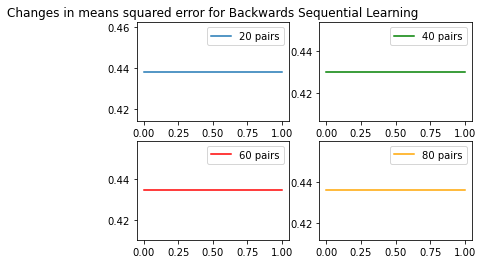

In [510]:

plt.subplot(2,2,1)
plt.title("Changes in means squared error for Backwards Sequential Learning")
plt.plot(dback20,label = "20 pairs")

plt.legend()
plt.subplot(2,2,2)
plt.plot(dback40,label = "40 pairs",color = "green")
plt.legend()

plt.subplot(2,2,3)
plt.plot(dback60,label = "60 pairs",color = "red")
plt.legend()

plt.subplot(2,2,4)
plt.plot(dback80,label = "80 pairs",color = "orange")
plt.legend()


plt.show()

In [530]:
lin = linear_as(20,100)

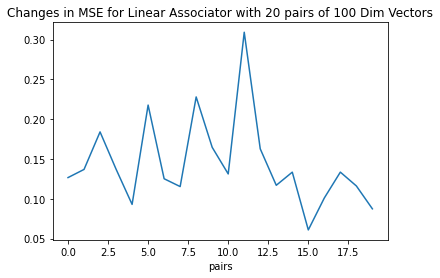

In [534]:
plt.plot(lin)
plt.xlabel("pairs")
plt.title("Changes in MSE for Linear Associator with 20 pairs of 100 Dim Vectors")
plt.show()